# Pizza classifier

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
classes = ['capricciosa', 'diavola']
from pathlib import Path
path = Path('data')
pathd = {path/c for c in classes}

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

capricciosa


diavola


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)

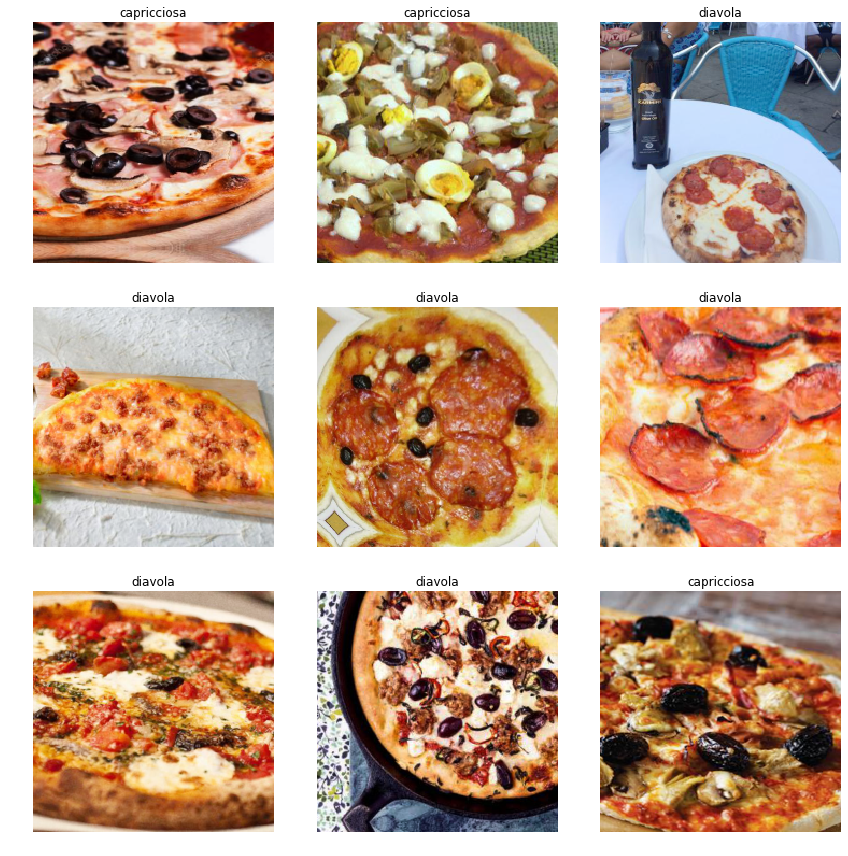

In [7]:
data.show_batch(rows=3)

In [8]:
data.classes, data.c

(['capricciosa', 'diavola'], 2)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

In [11]:
learn.save('stage-1')

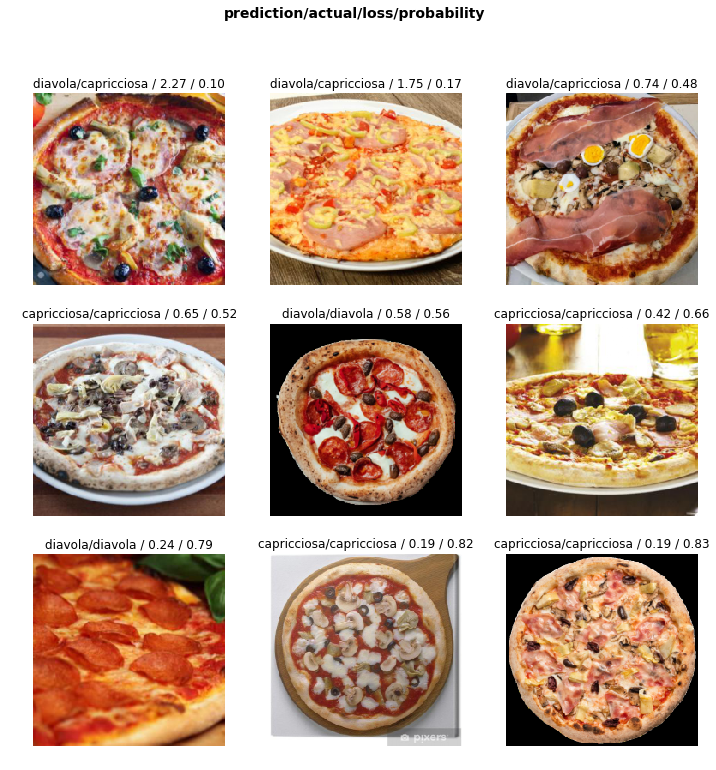

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=False)

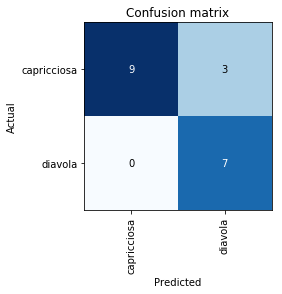

In [13]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


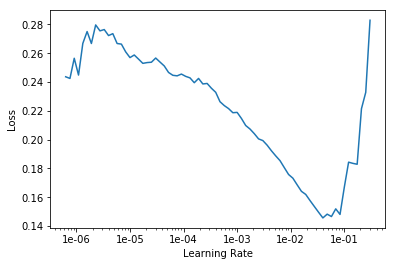

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-4, 1e-2))

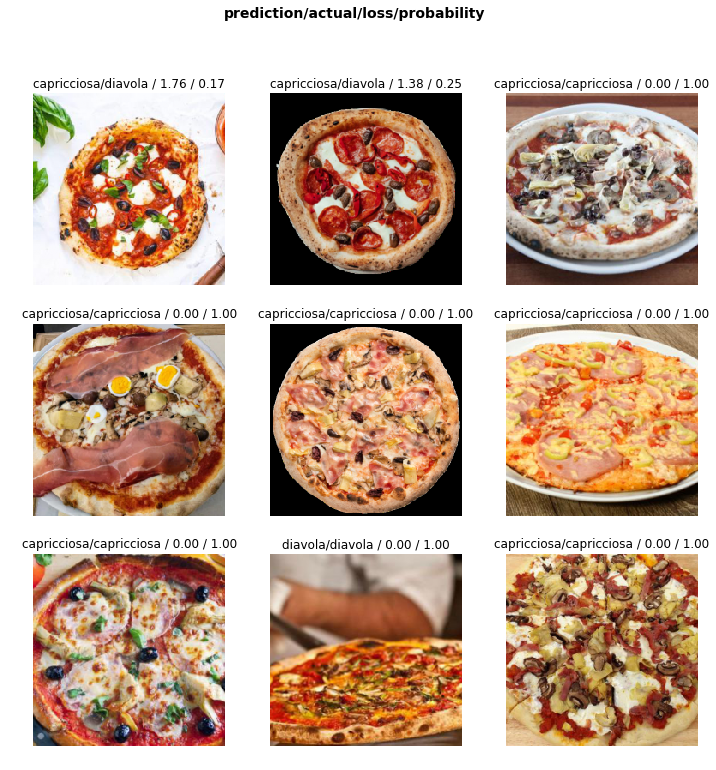

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=False)

In [17]:
learn.save('stage-2')

# Data cleaning

In [23]:
from fastai.widgets import *

In [24]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [25]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [26]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [27]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [29]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                   .split_none()
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [30]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [33]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, csv_labels='cleaned.csv', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)

In [34]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.load('stage-2')
learn.fit_one_cycle(4)

In [35]:
learn.save('stage-3')

In [36]:
learn.fit_one_cycle(4)

In [37]:
learn.save('stage-4')

In [38]:
learn.fit_one_cycle(4)

In [39]:
learn.fit_one_cycle(4)

In [40]:
learn.load('stage-4')
learn.fit_one_cycle(4)

In [41]:
learn.save('stage-5')

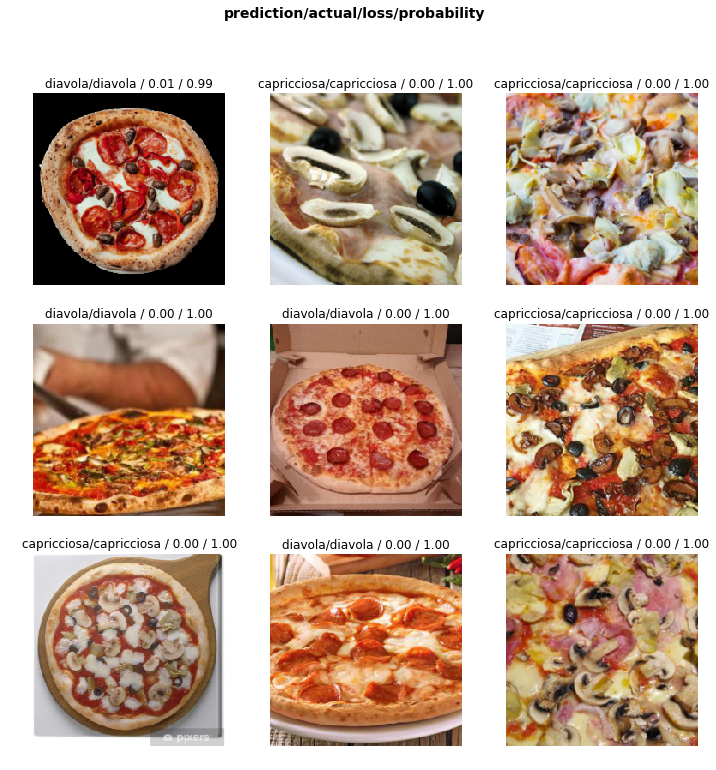

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=False)

# Export model

In [43]:
learn.export()

In [44]:
defaults.device = torch.device('cpu')

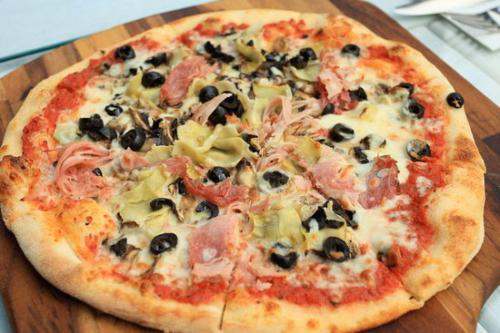

In [45]:
img = open_image(path/'capricciosa'/'17. pizza-capricciosa.jpg')
img

In [46]:
learn = load_learner(path)

In [47]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category capricciosa